In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

music = pd.DataFrame()
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]
music['bpm'] = [ 105, 90, 78, 75, 120, 110, 80, 100, 105, 60,
                  70, 105, 95, 70, 90, 105, 70, 75, 102, 100,
                  100, 95, 90, 80, 90, 80, 100, 105, 70, 65]

# KNN Regression

So far we've introduced KNN as a classifier, meaning it assigns observations to categories or assigns probabilities to the various categories. However, KNN is also a reasonable algorithm for regression. It's a simple extension of what we've learned before and just as easy to implement.

## Everything's the Same

Switching KNN to a regression is a simple process. In our previous models, each of the $k$ oberservations voted for a _category_. As a regression they vote instead for a _value_. Then instead of taking the most popular response, the algorithm averages all of the votes. If you have weights you perform a weighted average.

It's really that simple.

Let's go over a quick example just to confirm your understanding.

Let's stick with the world of music. Instead of trying to classify songs as rock or jazz, lets take the same data with an additional column: beats per minute, or BPM. Can we train our model to predict BPM?

First let's try to predict just in terms of loudness, as this will be easier to represent graphically.

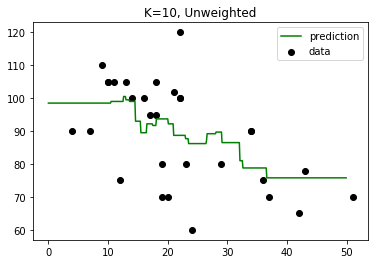

In [2]:
from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

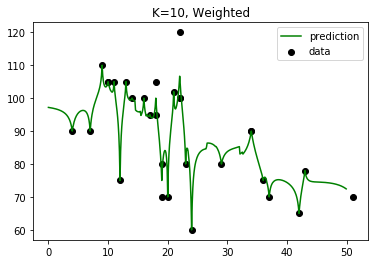

In [3]:
# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn_w.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Weighted')
plt.show()

Notice how it seems like the weighted model grossly overfits to points. It is interesting that it oscillates around the datapoints. This is because the decay in weight happens so quickly.


## Validating KNN

Now validating KNN, whether a regression or a classifier, is pretty much exactly the same as evaluating other classifiers or regression. Cross validation is still tremendously valuable. You can do holdouts. You even still get an $R^2$ value for the regression.

Why don't we validate that overfitting of the previous model with some k-fold cross validation? The test statistic given by this model is $R^2$, which measures the same as in linear regression.

In [4]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.18 (+/- 0.66)
Weighted Accuracy: 0.11 (+/- 0.94)


First let me state that these two models are fantastically awful. There doesn't seem to be much of a relationship. It's all very poor. However the increased variance in the weighted model is interesting.

Why don't you add the other feature and mess around with $k$ and weighting to see if you can do any better than we've done so far?

# Exercise Begins

In [5]:
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [6]:
music.head()

,duration,loudness,bpm
0,184,18,105
1,134,34,90
2,243,43,78
3,186,36,75
4,122,22,120


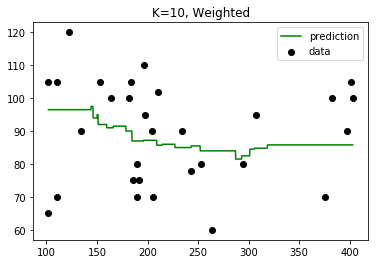

In [7]:
# Creating model only with remaining feature
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(music.duration)
Y = music.bpm
knn.fit(X, Y)

T = np.arange(music.duration.min(), music.duration.max(), 0.1)[:, np.newaxis]

Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Weighted')
plt.show()

In [8]:
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Unweighted Accuracy: -0.44 (+/- 0.81)


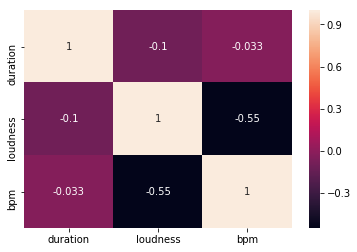

In [9]:
sns.heatmap(music.corr(), annot=True)

No evident correlation between duration and target variable BPM. Consequently, the prediction is poor as well.

In [10]:
# Creating model with both features of loudness and duration to predict bpm
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = music[['duration','loudness']]
Y = music.bpm
knn.fit(X, Y)

Y_=knn.predict(X)

score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Unweighted Accuracy: -0.42 (+/- 0.78)


In [11]:
# Adding weights
knn = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = music[['duration','loudness']]
Y = music.bpm
knn.fit(X, Y)

Y_=knn.predict(X)

score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Unweighted Accuracy: -0.26 (+/- 0.74)


#### Adjusting Features to Try and Increase Accuracy

,duration,loudness,bpm,duration_log,duration_squared,duration_root,loudness_log,loudness_squared,loudness_root
0,184,18,105,5.214936,33856,13.564660,2.890372,324,4.242641
1,134,34,90,4.897840,17956,11.575837,3.526361,1156,5.830952
2,243,43,78,5.493061,59049,15.588457,3.761200,1849,6.557439
3,186,36,75,5.225747,34596,13.638182,3.583519,1296,6.000000
4,122,22,120,4.804021,14884,11.045361,3.091042,484,4.690416


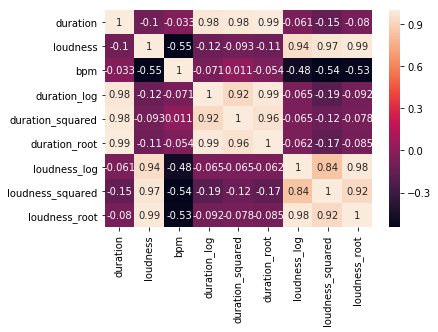

In [12]:
music['duration_log'] = music.duration.apply(np.log)
music['duration_squared'] = music.duration**2
music['duration_root'] = music.duration**.5

music['loudness_log'] = music.loudness.apply(np.log)
music['loudness_squared'] = music.loudness**2
music['loudness_root'] = music.loudness**.5

sns.heatmap(music.corr(), annot=True)
music.head()

In [13]:
# Using most polarizing features as the variables for X
knn = neighbors.KNeighborsRegressor(n_neighbors=20, weights='distance')
X = music[['loudness_squared','duration_log']]
Y = music.bpm
knn.fit(X, Y)

Y_=knn.predict(X)

score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Unweighted Accuracy: 0.15 (+/- 0.59)


In [14]:
for x in range(1,25):
    knn = neighbors.KNeighborsRegressor(n_neighbors=x, weights='distance')
    X = music[['loudness_squared','duration_log']]
    Y = music.bpm
    knn.fit(X, Y)

    Y_=knn.predict(X)

    score = cross_val_score(knn, X, Y, cv=5)
    print("Weighted Accuracy of %.0f Neighbors: %0.2f (+/- %0.2f)" % (x, score.mean(), score.std() * 2))

Weighted Accuracy of 1 Neighbors: -0.36 (+/- 3.22)
Weighted Accuracy of 2 Neighbors: -0.07 (+/- 2.20)
Weighted Accuracy of 3 Neighbors: 0.24 (+/- 0.65)
Weighted Accuracy of 4 Neighbors: 0.23 (+/- 0.69)
Weighted Accuracy of 5 Neighbors: 0.20 (+/- 0.75)
Weighted Accuracy of 6 Neighbors: 0.22 (+/- 0.68)
Weighted Accuracy of 7 Neighbors: 0.18 (+/- 0.78)
Weighted Accuracy of 8 Neighbors: 0.18 (+/- 0.73)
Weighted Accuracy of 9 Neighbors: 0.18 (+/- 0.72)
Weighted Accuracy of 10 Neighbors: 0.17 (+/- 0.69)
Weighted Accuracy of 11 Neighbors: 0.17 (+/- 0.68)
Weighted Accuracy of 12 Neighbors: 0.19 (+/- 0.64)
Weighted Accuracy of 13 Neighbors: 0.18 (+/- 0.63)
Weighted Accuracy of 14 Neighbors: 0.18 (+/- 0.62)
Weighted Accuracy of 15 Neighbors: 0.17 (+/- 0.61)
Weighted Accuracy of 16 Neighbors: 0.16 (+/- 0.62)
Weighted Accuracy of 17 Neighbors: 0.16 (+/- 0.60)
Weighted Accuracy of 18 Neighbors: 0.16 (+/- 0.60)
Weighted Accuracy of 19 Neighbors: 0.15 (+/- 0.60)
Weighted Accuracy of 20 Neighbors: 0.1

In [15]:
for x in range(1,25):
    knn = neighbors.KNeighborsRegressor(n_neighbors=x)
    X = music[['loudness_squared','duration_log']]
    Y = music.bpm
    knn.fit(X, Y)

    Y_=knn.predict(X)

    score = cross_val_score(knn, X, Y, cv=5)
    print("Unweighted Accuracy of %.0f Neighbors: %0.2f (+/- %0.2f)" % (x, score.mean(), score.std() * 2))

Unweighted Accuracy of 1 Neighbors: -0.36 (+/- 3.22)
Unweighted Accuracy of 2 Neighbors: -0.25 (+/- 2.28)
Unweighted Accuracy of 3 Neighbors: 0.05 (+/- 0.73)
Unweighted Accuracy of 4 Neighbors: -0.06 (+/- 0.81)
Unweighted Accuracy of 5 Neighbors: -0.22 (+/- 1.23)
Unweighted Accuracy of 6 Neighbors: -0.19 (+/- 0.98)
Unweighted Accuracy of 7 Neighbors: -0.24 (+/- 1.07)
Unweighted Accuracy of 8 Neighbors: -0.19 (+/- 0.76)
Unweighted Accuracy of 9 Neighbors: -0.18 (+/- 0.61)
Unweighted Accuracy of 10 Neighbors: -0.15 (+/- 0.47)
Unweighted Accuracy of 11 Neighbors: -0.12 (+/- 0.44)
Unweighted Accuracy of 12 Neighbors: -0.07 (+/- 0.35)
Unweighted Accuracy of 13 Neighbors: -0.05 (+/- 0.42)
Unweighted Accuracy of 14 Neighbors: -0.07 (+/- 0.41)
Unweighted Accuracy of 15 Neighbors: -0.08 (+/- 0.44)
Unweighted Accuracy of 16 Neighbors: -0.09 (+/- 0.43)
Unweighted Accuracy of 17 Neighbors: -0.09 (+/- 0.33)
Unweighted Accuracy of 18 Neighbors: -0.09 (+/- 0.29)
Unweighted Accuracy of 19 Neighbors: -

In [16]:
# Using most polarizing features as the variables for X
knn = neighbors.KNeighborsRegressor(n_neighbors=3, weights='distance')
X = music[['loudness_squared','duration_log']]
Y = music.bpm
knn.fit(X, Y)

Y_=knn.predict(X)

score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Unweighted Accuracy: 0.24 (+/- 0.65)


The Weighted KNN Regression performs considerably better than its unweighted counterpart. Moreover, we see that the model performs better when used with fewer neighbors (namely, 3).

In conclusion, the new model has increased accuracy by 13% while also decreasing the standard deviation between cross-validated groups. **Success!**